In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
df = pd.read_csv('Spotify_Youtube.csv')
df

Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                               Track  \
0                                     Feel Good Inc.   
1                                    Rhinestone Eyes   
2      New Gold (feat. Tame Impala and Bootie Brown)   
3                                 On Melancholy Hill   
4                                     Clint Eastwood   
...                                              ...   
20713                           JUST DANCE HARDSTYLE   
20714                 SET FIRE TO THE RAIN HARDSTYLE   
20715                      OUTSIDE HARDSTYLE SPED UP   
20716                            ONLY GIRL HARDSTYLE   
20717                             MISS YOU HARDSTYLE   

                                               Album Album_type  \
0                                         Demon Days      album   
1                                      Plastic Beach      album   
2      New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                      Plastic Beach      album   
4                                           Gorillaz      album   
...                                              ...        ...   
20713                           JUST DANCE HARDSTYLE     single   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single   
20715                      OUTSIDE HARDSTYLE SPED UP     single   
20716                            ONLY GIRL HARDSTYLE     single   
20717                             MISS YOU HARDSTYLE     single   

                                        Uri  Danceability  Energy   Key  ...  \
0      spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1      spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2      spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3      spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4      spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   
...                                     ...           ...     ...   ...  ...   
20713  spotify:track:0RtcKQGyI4hr8FgFH1TuYG         0.582   0.926   5.0  ...   
20714  spotify:track:3rHvPA8lUnPBkaLyPOc0VV         0.531   0.936   4.0  ...   
20715  spotify:track:4jk00YxPtPbhvHJE9N4ddv         0.443   0.830   4.0  ...   
20716  spotify:track:5EyErbpsugWliX006eTDex         0.417   0.767   9.0  ...   
20717  spotify:track:6lOn0jz1QpjcWeXo1oMm0k         0.498   0.938   6.0  ...   

                                       Url_youtube  \
0      https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1      https://www.youtube.com/watch?v=yYDmaexVHic   
2      https://www.youtube.com/watch?v=qJa-VFwPpYA   
3      https://www.youtube.com/watch?v=04mfKJWDSzI   
4      https://www.youtube.com/watch?v=1V_xRb0x9aw   
...                                            ...   
20713  https://www.youtube.com/watch?v=5SHmKFKlNqI   
20714 

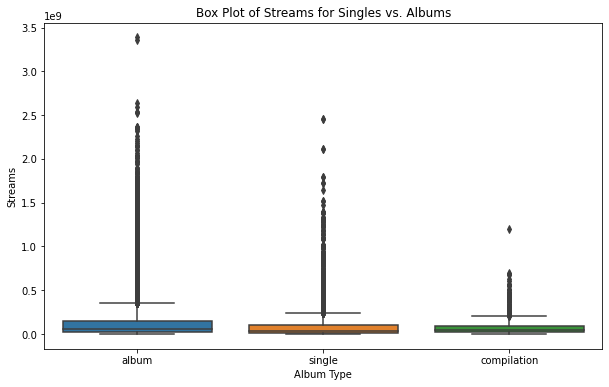

In [5]:
#box plot that combines all artist album, single, and compilation to one 

plt.figure(figsize=(10, 6))
sns.boxplot(x='Album_type', y='Stream', data=df)


plt.xlabel('Album Type')
plt.ylabel('Streams')
plt.title('Box Plot of Streams for Singles vs. Albums')

plt.show()

In [8]:
#finds the top 10 streaming artists

artist_streams = df.groupby('Artist')['Stream'].sum()

top_artists = artist_streams.sort_values(ascending=False)

print(top_artists.head(10))

Top Artists by Total Streams:
Artist
Post Malone        1.525126e+10
Ed Sheeran         1.439488e+10
Dua Lipa           1.340808e+10
XXXTENTACION       1.322435e+10
The Weeknd         1.303197e+10
Justin Bieber      1.209777e+10
Imagine Dragons    1.185831e+10
Coldplay           1.177848e+10
Khalid             1.138684e+10
Bruno Mars         1.089786e+10
Name: Stream, dtype: float64


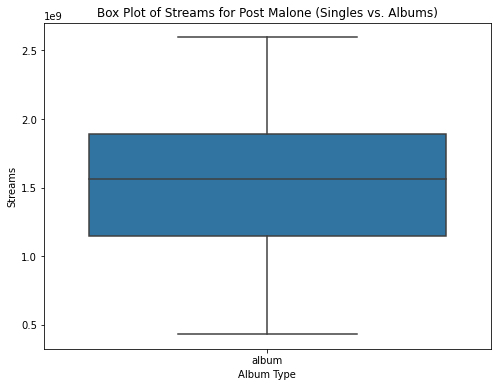

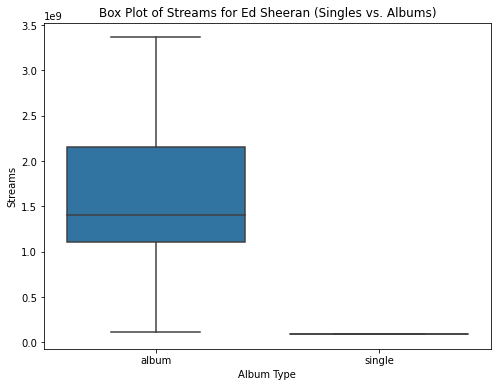

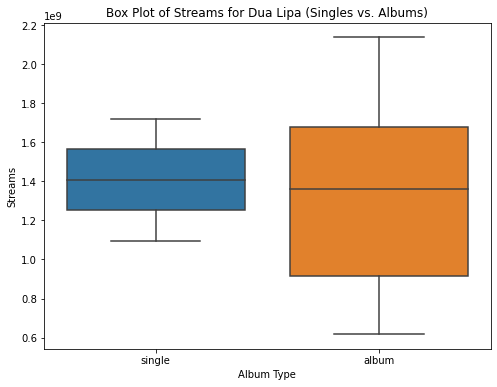

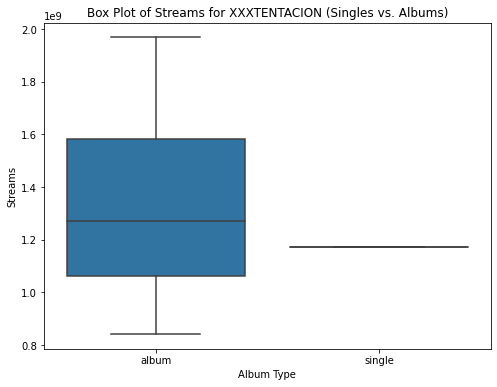

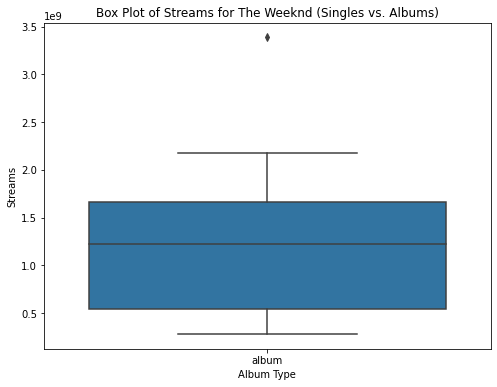

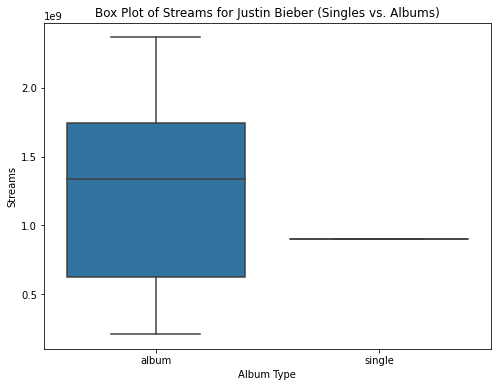

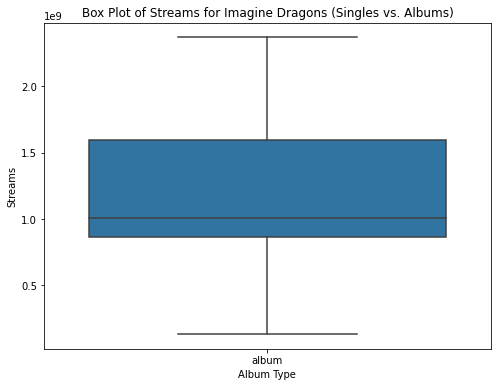

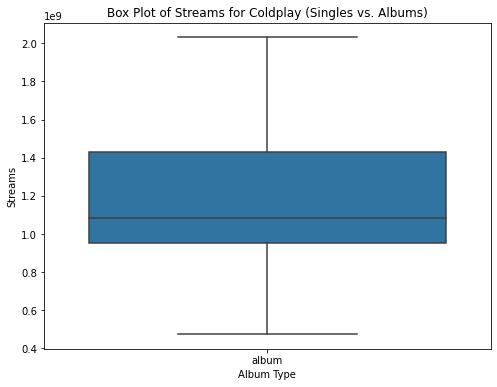

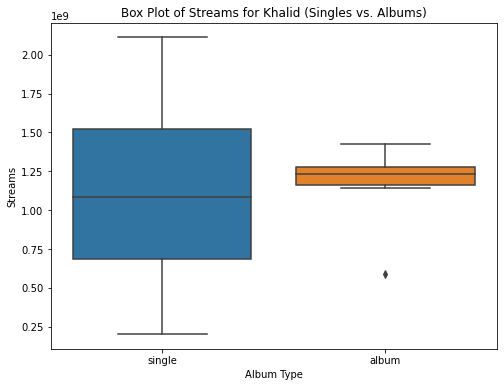

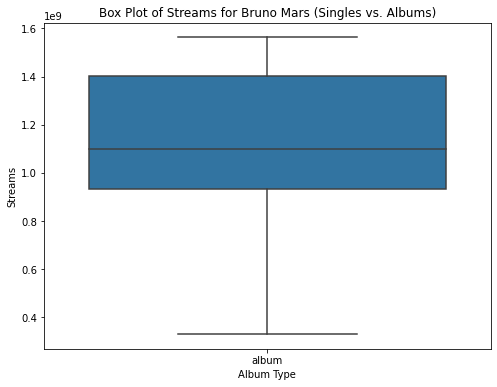

In [12]:
#box plot for the top 10 artists

top_artists = ['Post Malone', 'Ed Sheeran', 'Dua Lipa', 'XXXTENTACION', 'The Weeknd', 'Justin Bieber', 'Imagine Dragons', 'Coldplay', 'Khalid', 'Bruno Mars']

for artist in top_artists:
    artist_df = df[df['Artist'] == artist]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Album_type', y='Stream', data=artist_df)
    plt.title(f'Box Plot of Streams for {artist} (Singles vs. Albums)')
    plt.xlabel('Album Type')
    plt.ylabel('Streams')
    plt.show()

In [14]:
#top 10 artists with both albums and singles

artist_counts = df.groupby('Artist')['Album_type'].nunique()

artists_with_both = artist_counts[artist_counts == 2].index.tolist()

df_filtered = df[df['Artist'].isin(artists_with_both)]

artist_streams = df_filtered.groupby('Artist')['Stream'].sum()

top_artists = artist_streams.sort_values(ascending=False)

print(top_artists.head(10))  


Top Artists with Both Albums and Singles by Total Streams:
Artist
Ed Sheeran          1.439488e+10
Dua Lipa            1.340808e+10
XXXTENTACION        1.322435e+10
Justin Bieber       1.209777e+10
Khalid              1.138684e+10
Ariana Grande       1.085741e+10
Billie Eilish       1.074717e+10
The Chainsmokers    1.039670e+10
Shawn Mendes        1.011131e+10
Calvin Harris       9.548542e+09
Name: Stream, dtype: float64


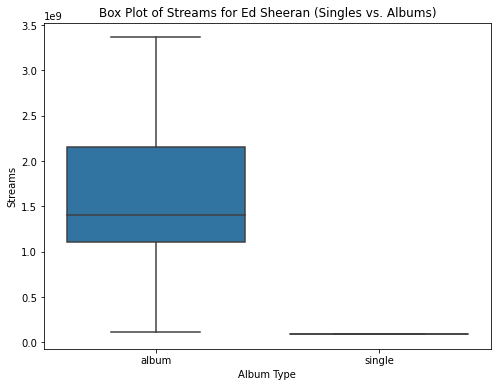

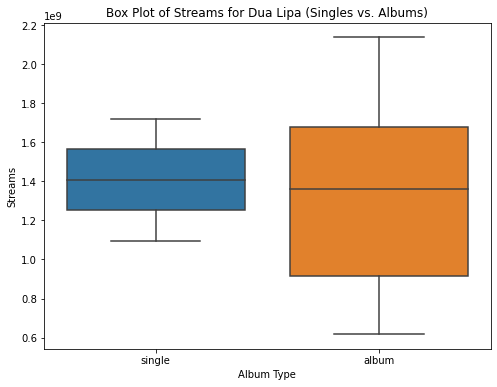

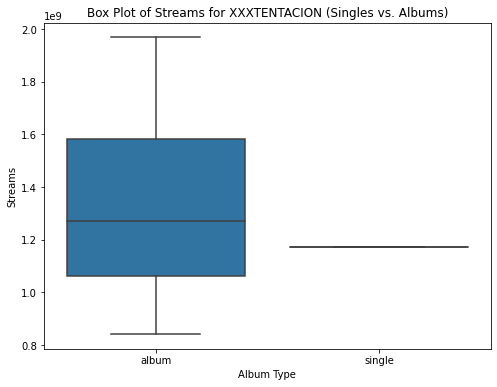

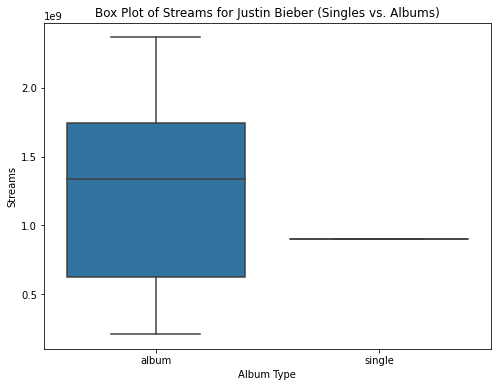

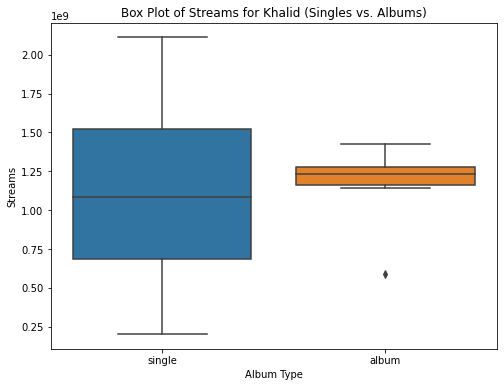

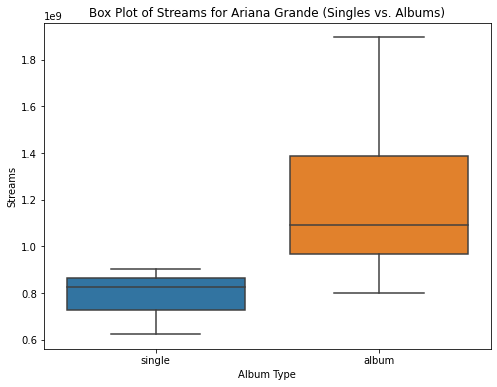

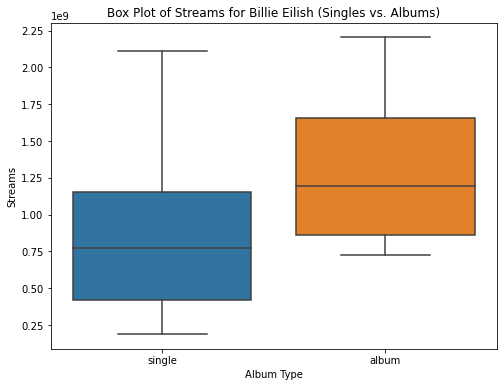

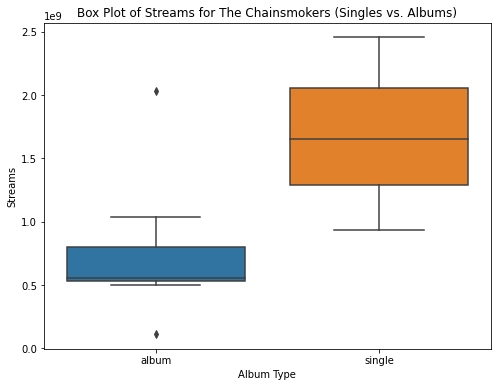

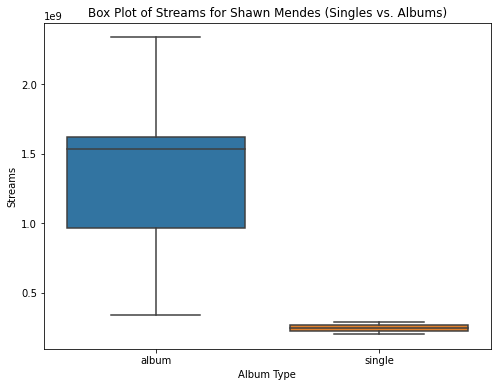

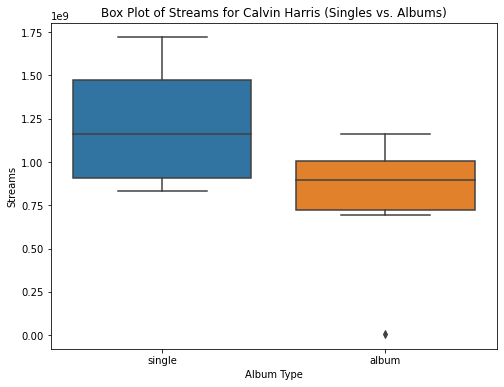

In [17]:
#box plot for the top 10 artists with both album and singles

top_artists = ['Ed Sheeran', 'Dua Lipa', 'XXXTENTACION', 'Justin Bieber', 'Khalid', 'Ariana Grande', 'Billie Eilish', 'The Chainsmokers', 'Shawn Mendes', 'Calvin Harris']

for artist in top_artists:
    artist_df = df[df['Artist'] == artist]
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Album_type', y='Stream', data=artist_df)
    plt.title(f'Box Plot of Streams for {artist} (Singles vs. Albums)')
    plt.xlabel('Album Type')
    plt.ylabel('Streams')
    plt.show()